# Chaos based Image Encryption

In [ ]:
import os

from PIL.Image import open as load_pic, new as new_pic, fromarray
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline

### Fourth Order Runga-Kutta 

The Runge-Kutta 4th order (RK4) method is a numerical technique commonly used for solving ordinary differential equations (ODEs). It is an improvement over the Euler method, which is a simple first-order method that can be inaccurate for some ODEs. RK4 is a fourth-order method, meaning that it achieves a higher accuracy than Euler's method by taking four steps for each interval instead of just one. The method works by calculating the slope of the function at four different points within each interval and using a weighted average of these slopes to estimate the value of the function at the end of the interval.





In [ ]:
def RK4(f,x0,ti,tf,N):
    h=(tf-ti)/N
    t=np.zeros(N+1)
    n=x0.size
    x=np.zeros((n,N+1))
    x[:,0]=x0
    for i in range(N):
        k1 = f(t[i], x[:, i])
        k2 = f(t[i] + h / 2., x[:, i] + h * k1 / 2.)
        k3 = f(t[i] + h / 2., x[:, i] + h * k2 / 2.)
        k4 = f(t[i] + h, x[:, i] + h * k3)
        dx = h*( k1 + 2. * k2 + 2. * k3 + k4) / 6.
        t[i+1]=t[i]+h
        x[:,i+1]=x[:,i]+ dx
    return t , x

### Chaos systems

A chaotic system is a complex dynamic system whose behavior is highly sensitive to initial conditions, meaning that small changes in the initial state of the system can lead to vastly different outcomes over time. This sensitivity to initial conditions is known as the butterfly effect, as small perturbations in one part of the system can amplify and propagate through the system in a way that is difficult to predict. Chaotic systems are characterized by their non-linear dynamics, which means that the relationship between the system's inputs and outputs is not proportional or easily predictable. This can lead to complex and irregular patterns of behavior, often exhibiting seemingly random fluctuations, but with underlying structures and patterns that can be studied using mathematical techniques. Chaotic systems can be found in a wide range of natural and artificial phenomena, such as weather patterns, the motion of planets, and the behavior of financial markets. The study of chaotic systems has important implications for fields such as physics, mathematics, biology, and engineering, and has led to the development of new theories and techniques for modeling and predicting complex behaviors.

In [ ]:
def lorenz(t,x):
    return np.array([10*(x[1]-x[0]),28*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-(8/3)*x[2]])

def chen(t,x):
    return np.array([35*(x[1]-x[0]), -7*x[0] - x[0]*x[2] + 28*x[1], x[0]*x[1] - 3*x[2] ])

### Chens Chaotic system

Chen's chaotic system is a three-dimensional non-linear dynamic system that exhibits chaotic behavior. It was first introduced by the Taiwanese mathematician, Tsing-Fang Chen, in 1999. The system consists of three variables: x, y, and z, which represent the state variables of the system. Chen's chaotic system is described by a set of non-linear differential equations, which govern the evolution of the state variables over time.

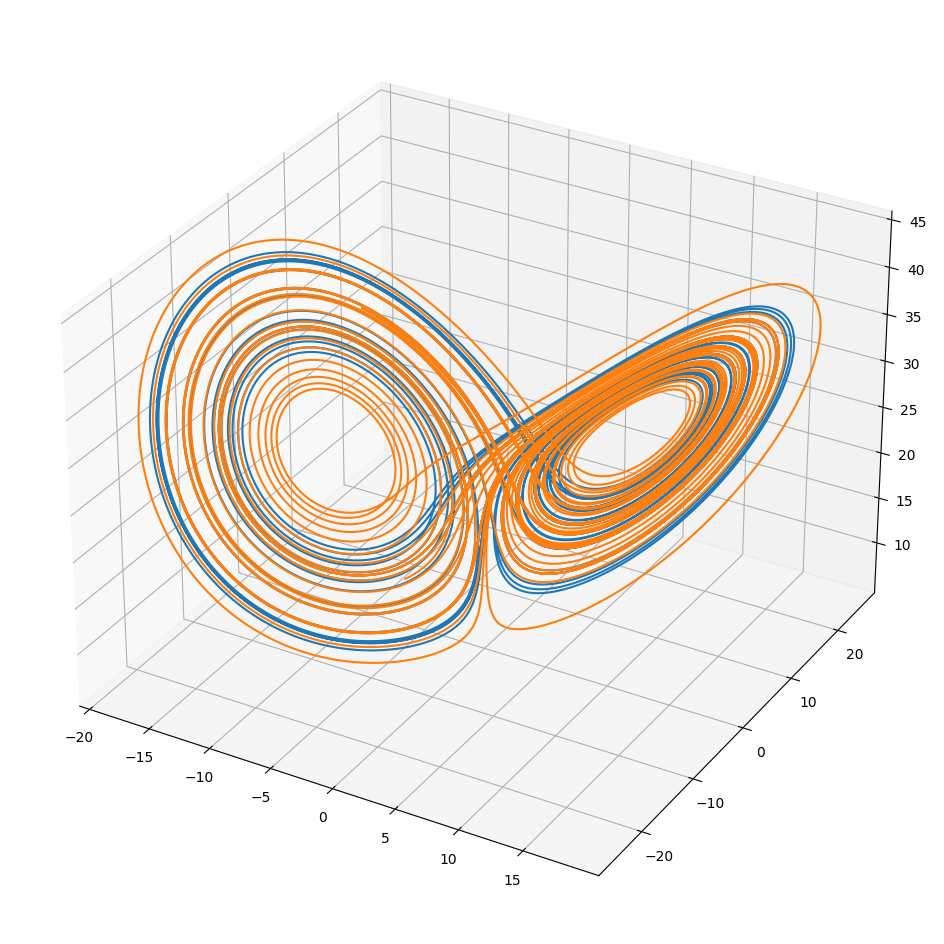

In [ ]:
x0=np.array([-10.058,0.368,37.368])
x1=np.array([-10.058,0.368,37.3680001])
t,x=RK4(lorenz,x0,0,40,50625)
t1,x1=RK4(lorenz,x1,0,40,50625)
fig=plt.figure(figsize=(12,12))
ax=plt.axes(projection='3d')
ax.plot(x[0],x[1],x[2])
ax.plot(x1[0],x1[1],x1[2])
#plt.savefig("1.jpg")
#files.download("1.jpg")
plt.show()

### Lorenz chaotic system

Lorenz's chaotic system is a three-dimensional non-linear dynamic system that exhibits chaotic behavior. It was first introduced by the American mathematician and meteorologist, Edward Lorenz, in 1963, while he was studying the behavior of the Earth's atmosphere. The system consists of three variables: x, y, and z, which represent the state variables of the system. Lorenz's chaotic system is described by a set of non-linear differential equations, which govern the evolution of the state variables over time. 

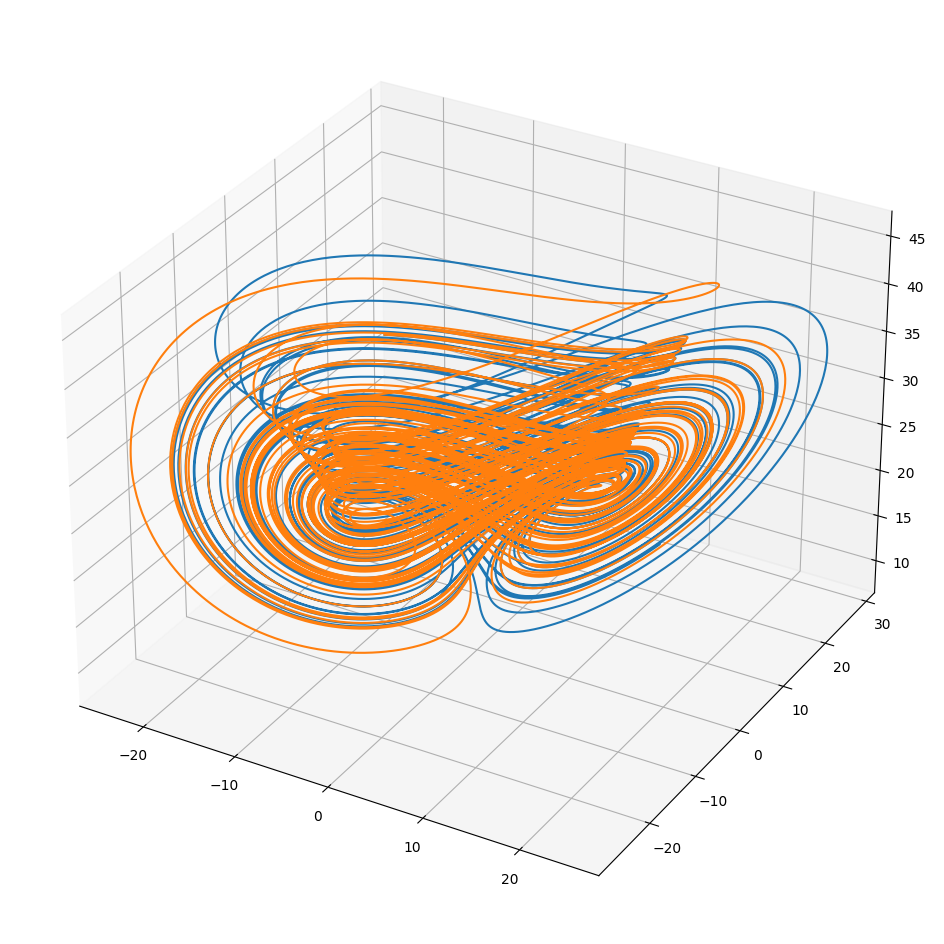

In [ ]:
x0=np.array([-10.058,0.368,37.368])
x1=np.array([-10.058,0.368,37.3680001])
t,x=RK4(chen,x0,0,40,50625)
t1,x1=RK4(chen,x1,0,40,50625)
fig=plt.figure(figsize=(12,12))
ax=plt.axes(projection='3d')
ax.plot(x[0],x[1],x[2])
ax.plot(x1[0],x1[1],x1[2])
#plt.savefig("1.jpg")
#files.download("1.jpg")
plt.show()

### Ardnold Cat Map

The Arnold cat map, also known as the cat map, is a two-dimensional chaotic map that was introduced by the Russian mathematician, Vladimir Arnold, in 1968. The map is a discrete-time dynamical system that takes an image or a point in a plane and transforms it into a new image or point in a way that is highly sensitive to initial conditions. The Arnold cat map is often used as a canonical example of chaotic maps due to its simple yet intricate dynamics. The map is defined by the following equations:

In [ ]:
def arnold(path, iterations, keep_all=False, name="arnold_cat-{name}-{index}.png"):

    title = os.path.splitext(os.path.split(path)[1])[0]
    counter = 0
    while counter < iterations:
        with load_pic(path) as image:
            image = image.convert('L')
            dim = width, height = image.size
            with new_pic(image.mode, dim) as canvas:
                for x in range(width):
                    for y in range(height):
                        nx = (3 * x + 2*y) % width  #p = 2, q = 1
                        ny = (x + y) % height

                        canvas.putpixel((nx, height-ny-1), image.getpixel((x, height-y-1)))
        #print(canvas)
        #cv2_imshow(cv2.cvtColor(np.array(canvas),cv2.COLOR_BGR2RGB))
        #cv2.waitKey(200)
        #cv2.destroyAllWindows()
        plt.imshow(canvas,cmap='gray', vmin=0, vmax=255)
        plt.show()
        plt.clf()
        if counter > 0 and not keep_all:
            os.remove(path)
        counter += 1
        #print(counter, end="\r")
        path = name.format(name=title, index=counter)
        canvas.save(path)

    return np.array(canvas)

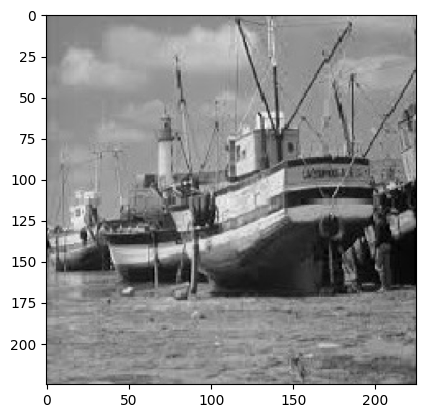

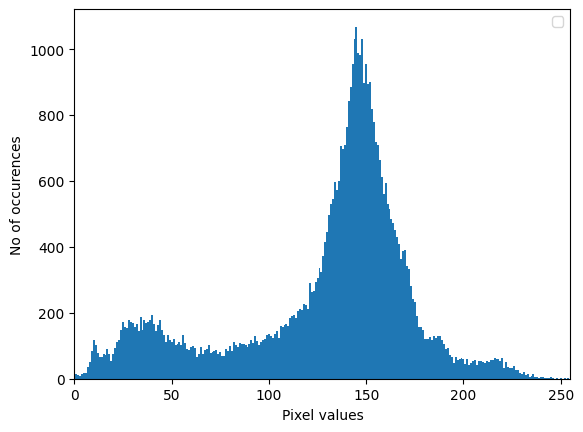

In [ ]:
path = "./ship.jpg"
raw_image = np.array(load_pic(path).convert('L'))
plt.imshow(raw_image,cmap = 'gray')
plt.show()
un, inst = np.unique(raw_image,return_counts = True)

plt.bar(un,inst,alpha = 1,width = 1)
plt.legend()
plt.xlim(0, 255)
plt.xlabel('Pixel values')
plt.ylabel('No of occurences')
plt.show()

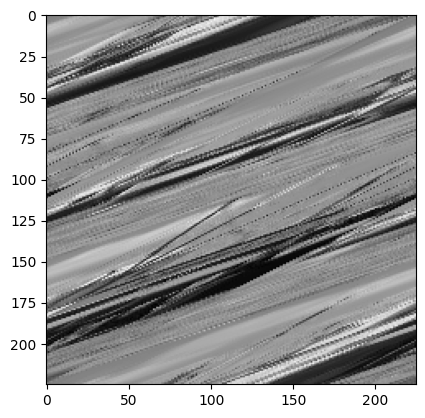

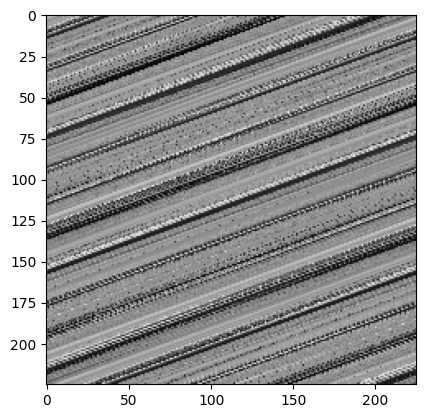

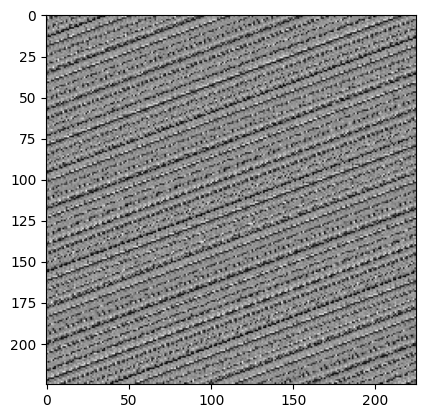

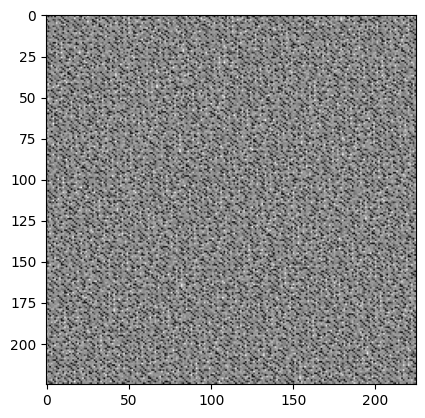

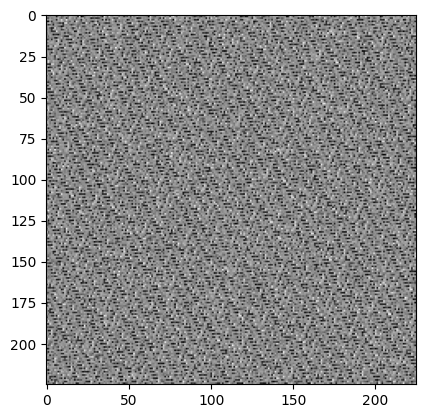

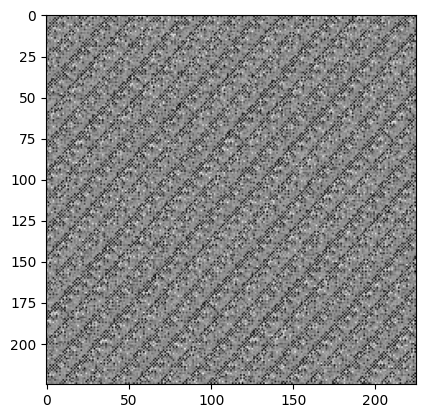

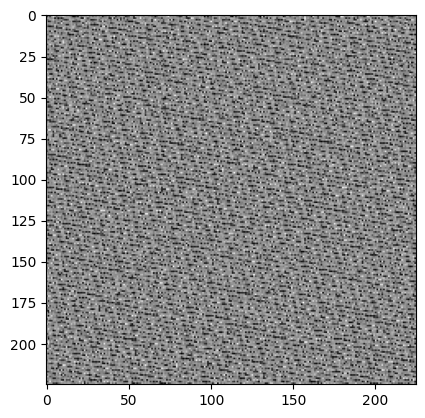

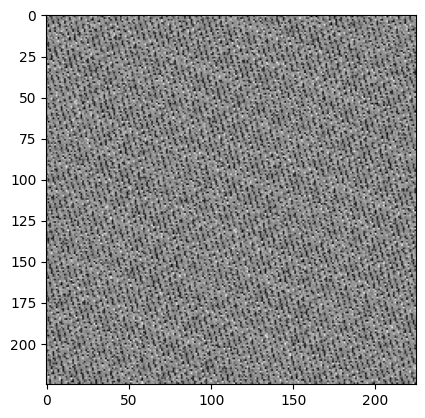

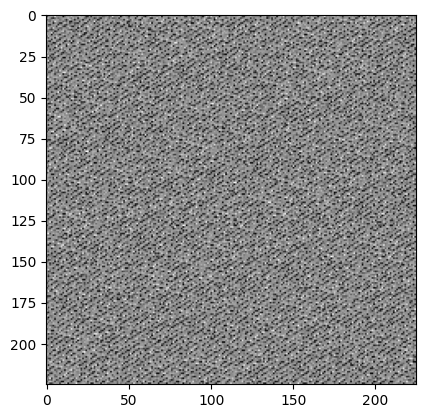

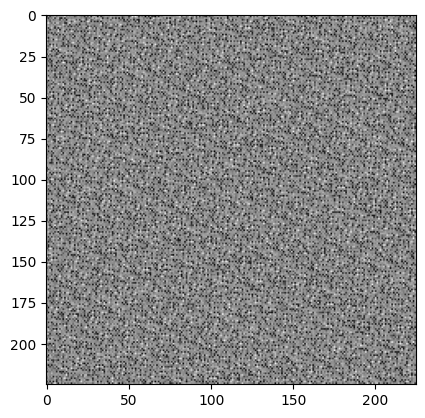

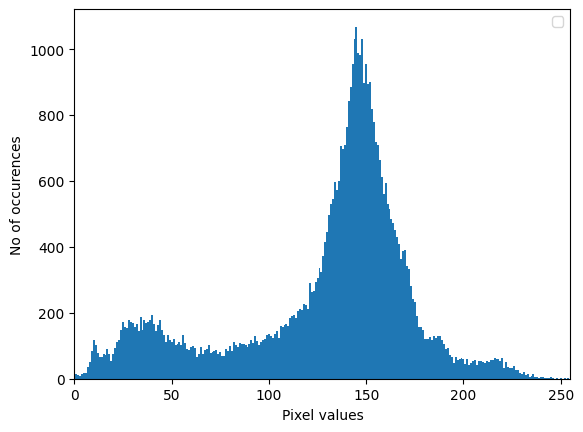

In [ ]:
result = arnold(path,10)

un, inst = np.unique(result,return_counts = True)
plt.bar(un,inst,alpha = 1,width = 1)
plt.legend()
plt.xlim(0, 255)
plt.xlabel('Pixel values')
plt.ylabel('No of occurences')
plt.show()

### De- Arnold 

Arnold's Cat is a function that given unitary matrix after n iterations. But if the number of iterations are not known, de-arnoldization can also be done byreversing the equations defined in the Arnold Cat Map.

In [ ]:
def de_arnold(img,iterations):

    counter = 0
    while counter < iterations:
      with fromarray(img) as image:
        dim = width, height = image.size
        with new_pic(image.mode, dim) as canvas:
            for x in range(width):
                for y in range(height):
                    nx = ( x + -2 * y) % width  #p = 2, q = 1
                    ny = (-x + 3*y) % height

                    canvas.putpixel((nx, height-ny-1), image.getpixel((x, height-y-1)))
        #print(canvas)
        #cv2.imshow(str(counter),cv2.cvtColor(np.array(canvas),cv2.COLOR_BGR2RGB))
        #cv2.waitKey(200)
        #cv2.destroyAllWindows()
        counter  = counter+1
        img = np.array(canvas)
    plt.imshow(image,cmap='gray', vmin=0, vmax=255)
    return image

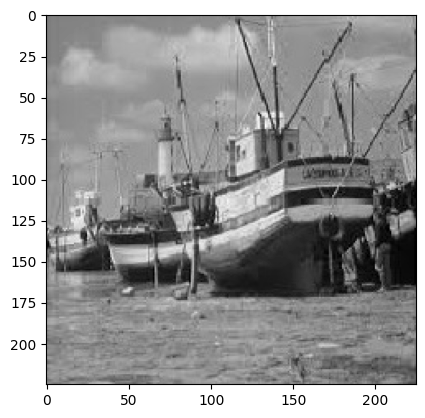

In [ ]:
result1 = de_arnold(result,11)

Decimal to binary (dec2bin) function converts decimal values into binary data that can then be used to encrpyt our image, whose pixels are also represented in binary

In [ ]:
def dec2bin(x):
    split = math.modf(x)
    integer = bin(int(split[1])).replace("0b", "")
    f = split[0]
    p = 0
    de = ''
    while ((2**p)*f) %1 != 0:
        num = f* (2 ** (p+1))
        if num < 1:
            de = de+str(0)
        else:
            de = de+str(1)
        f = math.modf(num)[0]
    return float(str(integer)+'.'+ de)

Preprocessing has to be done on the pixels of our image to make them eligible to be coded as such-

In [ ]:
def preprocess(x):
    return np.array((np.abs(x)-np.floor(x))*10**2%256)

### Chaos based encryption function

The pixels of our image are split in 3 parts and entangled with the values obtained on using RK4 method on Chen's chaotic system. Each part is entangled with one of the three touples obtained using the XOR logic gate

In [ ]:
def encrypt(c,val,fn,j):
    if j == 0:
        for i in range(1,16875):
            c[3*(i-1)+1] = int(val[3*(i-1)+1]) ^ int(fn[i])
    elif j == 1:
        for i in range(1,16875):
            c[3*(i-1)+2] = int(val[3*(i-1)+2]) ^ int(fn[i])
    elif j ==2:
        for i in range(1,16875):
            c[3*(i-1)+3] = int(val[3*(i-1)+3]) ^ int(fn[i])
    return c

### Decryption function

Decryption can be performed on our image using the same formula as the XOR function is reversible. Thus, performing the same itertion on our encrypted data will reverse the original image

In [ ]:
def decrypt(c,val,fn,j):
    if j == 0:
        for i in range(1,16875):
            c[3*(i-1)+1] = int(val[3*(i-1)+1]) ^ int(fn[i])
    elif j == 1:
        for i in range(1,16875):
            c[3*(i-1)+2] = int(val[3*(i-1)+2]) ^ int(fn[i])
    elif j ==2:
        for i in range(1,16875):
            c[3*(i-1)+3] = int(val[3*(i-1)+3]) ^ int(fn[i])
    return c

### Encryption

The execution is done in the following way -

1. Our image is defined as a matrix and Arnold's Cat Map is applied on it. A shuffled image is obatined.
2. This image is split in 3 parts. These are preprocessed with the given function
3. An inital condition for chen's chaotic system is defined. Chen's system is then processed using RK4 method to obtain our encryption lists.
4. The image alpha gradient is encrypted using the keys.
5. A plot is obtained of the alpha gradient of the image to complare the results.

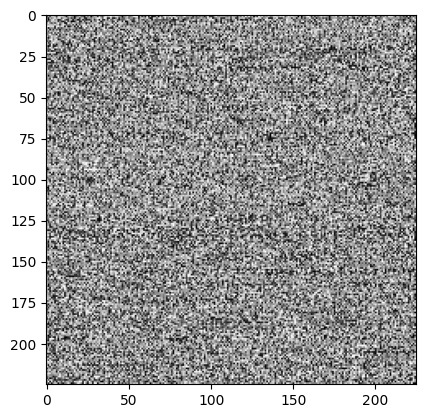

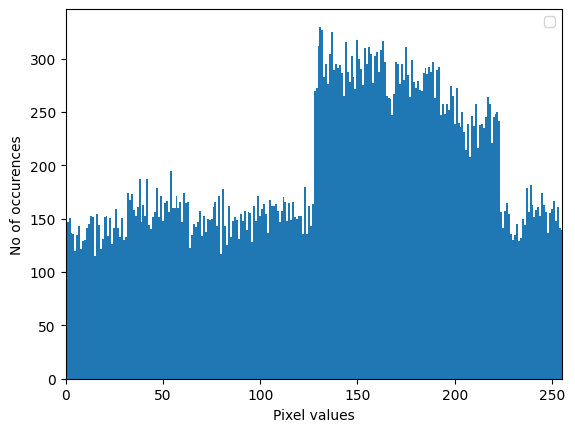

In [ ]:
arn_flat = result.flatten()

x0 = np.array([-10.058,0.368,37.368]) ## Initial conditions for chen's chaos system

t , x = RK4(chen,x0,0,50,len(arn_flat)) #returns the x, y, z, from chen's system at t time


B_x = preprocess(x[0])
B_y = preprocess(x[1])
B_z = preprocess(x[2])

eum = np.zeros(50625)

E_x = encrypt(eum,arn_flat,B_x,0) ## Encryption
E_y = encrypt(E_x,arn_flat,B_y,1)
E_z = encrypt(E_y,arn_flat,B_z,2)


en_img = np.reshape(E_z,(225,225))
plt.imshow(en_img,cmap='gray', vmin=0, vmax=255)
plt.show()

un, inst = np.unique(E_z,return_counts = True)

plt.bar(un,inst,alpha = 1,width = 1)
plt.legend()
plt.xlim(0, 255)
plt.xlabel('Pixel values')
plt.ylabel('No of occurences')
plt.show()


### Decryption

Decryption is done in the following manner
1. The encrypted image is split into three parts and preprocessed.
2. Keys for inital conditions of chen's chaotic system are obtained.
3. The key touple is generated
4. The touple is iterated using the keys using the XOR fucntion again. This gives us back the post arnold image
5. The image is dearnolded to obtain the original image


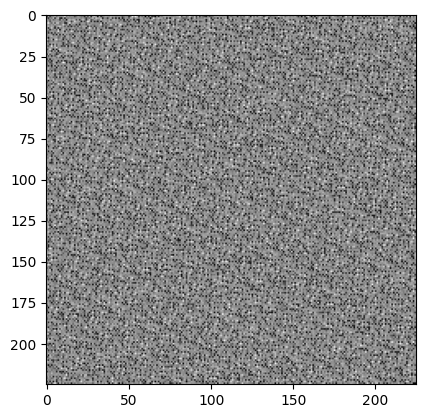

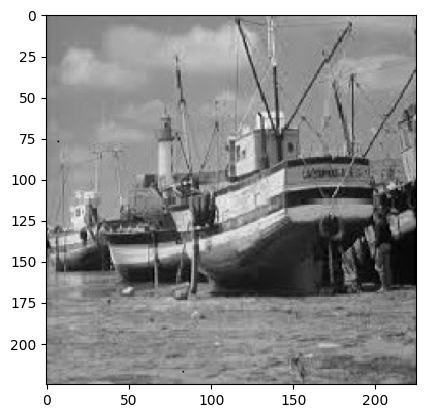

In [ ]:
dum = np.zeros(50625)

D_x = decrypt(dum,E_z,B_x,0)
D_y = decrypt(D_x,E_z,B_y,1)
D_z = decrypt(D_y,E_z,B_z,2)


dc_img = np.reshape(D_z,(225,225))
plt.imshow(dc_img,cmap='gray', vmin=0, vmax=255)
plt.show()
dec = de_arnold(dc_img, 11)

### Security Analysis

We can check the quality of security of our encryption by changing up the initial conditon of the chaos system by a small amount. We can see that this changes the entire array of keys and makes the image impossible to decrypt.

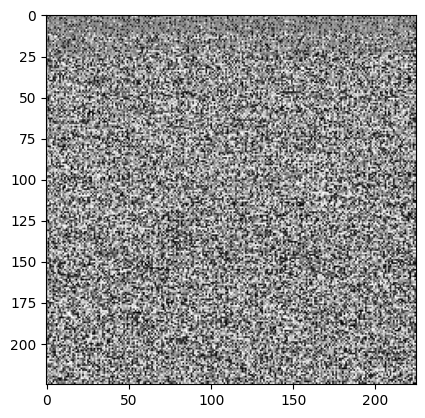

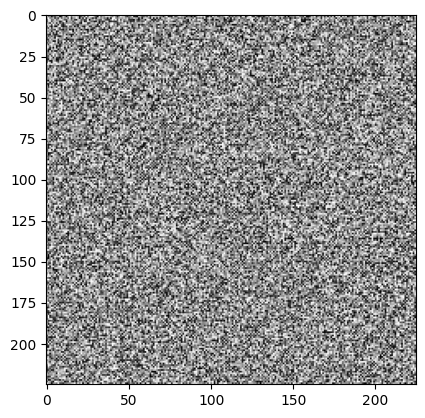

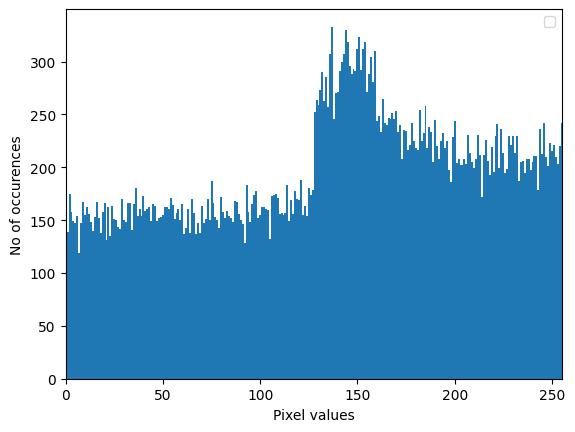

In [ ]:
x0 = np.array([-10.059,0.368,37.368]) ## Initial conditions for chen's chaos system

t , x = RK4(chen,x0,40,90,len(arn_flat)) #returns the x, y, z, from chen's system at t time


B_x = preprocess(x[0])
B_y = preprocess(x[1])
B_z = preprocess(x[2])

cdum = np.zeros(50625)

D_x = decrypt(cdum,E_z,B_x,0)
D_y = decrypt(D_x,E_z,B_y,1)
D_z = decrypt(D_y,E_z,B_z,2)


dc_img = np.reshape(D_z,(225,225))
plt.imshow(dc_img,cmap='gray', vmin=0, vmax=255)
plt.show()
dec = de_arnold(dc_img, 5)
plt.show()

un, inst = np.unique(D_z,return_counts = True)

plt.bar(un,inst,alpha = 1,width = 1)
plt.legend()
plt.xlim(0, 255)
plt.xlabel('Pixel values')
plt.ylabel('No of occurences')
plt.show()